# Sentiment Analysis

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#spacy imports
!pip install spacytextblob
import spacy  
from spacytextblob.spacytextblob import SpacyTextBlob
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')


Polarity is a float within the range [-1.0, 1.0], subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective, and assessments is a list of polarity and subjectivity scores for the assessed tokens.

In [2]:
nlp.add_pipe('spacytextblob')

In [3]:
data_current = pd.read_csv('phrase_data.csv')
announcement_data = pd.read_csv('announcement_data.csv')

In [5]:
data_current.drop('Unnamed: 0',axis=1,inplace=True)
announcement_data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
text_current = data_current.tweet

In [7]:
sentences = []

for i in text_current:
  i = i.replace('\n','')
  i = i.replace('RT','')
  sentences.append(i)



In [8]:
polarity = []
assessments = []
subjectivity = []
for t in sentences:
  doc = nlp(t)
  polarity.append(doc._.polarity)
  assessments.append(doc._.assessments)
  subjectivity.append(doc._.subjectivity)


In [9]:
sentiment_analysis = pd.DataFrame({'tweet_text':sentences,'polarity':polarity,'subjectivity':subjectivity,'assessments':assessments})

Data from April and May 

In [11]:
text_past = announcement_data.tweet
sentences_2 = []

for i in text_past:
  i = i.replace('\n','')
  i = i.replace('RT','')
  sentences_2.append(i)

polarity2 = []
assessments2 = []
subjectivity2 = []
for t in sentences_2:
  doc = nlp(t)
  polarity2.append(doc._.polarity)
  assessments2.append(doc._.assessments)
  subjectivity2.append(doc._.subjectivity)

past_sent_analysis = pd.DataFrame({'tweet_text':sentences_2,'polarity':polarity2,'subjectivity':subjectivity2,'assessments':assessments2})

In [36]:
sentiment_analysis['sub_binary'] = sentiment_analysis.subjectivity.apply(lambda x: 1 if x >=0.5 else 0 )

In [25]:
past_sent_analysis['sub_binary'] = past_sent_analysis.subjectivity.apply(lambda x: 1 if x >=0.5 else 0 )

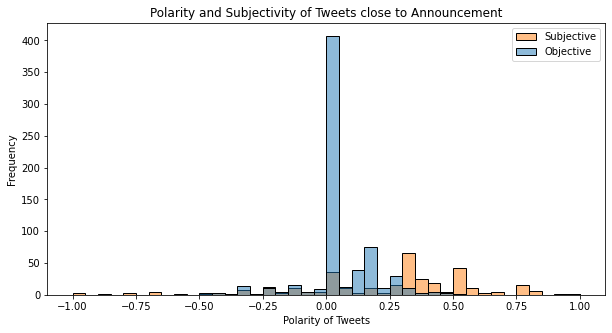

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(data=past_sent_analysis,x='polarity',alpha=0.5,hue='sub_binary')
sns.color_palette("tab10")
plt.xlabel('Polarity of Tweets')
plt.ylabel('Frequency')
plt.legend(['Subjective','Objective'])
plt.title('Polarity and Subjectivity of Tweets close to Announcement')
plt.show()

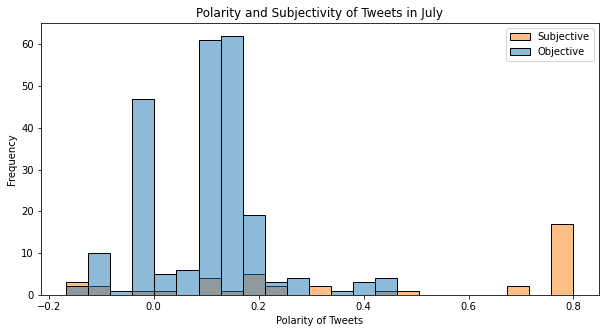

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(data=sentiment_analysis,x='polarity',alpha=0.5,hue='sub_binary')
sns.color_palette("tab10")
plt.xlabel('Polarity of Tweets')
plt.ylabel('Frequency')
plt.legend(['Subjective','Objective'])
plt.title('Polarity and Subjectivity of Tweets in July')
plt.show()